In [ ]:
import numpy as np
import pandas as pd


In [1]:
#data import

location = 'data/'

train = pd.read_csv(location + "train.csv")
test = pd.read_csv(location + 'test.csv')

Q. datetime의 object형을 datetime으로 파싱하는 이유?

A. EDA에서 datetime으로 날짜를 쪼개는 부분이 나온다

In [2]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [3]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


In [6]:
# 결측치는 없는 듯 하지만, 체크를 해보자
for col in train.columns:
    missing_percent_train = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (train[col].isnull().sum() / train[col].shape[0]))
    print(missing_percent_train)
    
print("=" * 50)

# 결측치는 없는 듯 하지만, 체크를 해보자
for col in test.columns:
    missing_percent_test = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (test[col].isnull().sum() / test[col].shape[0]))
    print(missing_percent_test)

column:   datetime	 Percent of NaN value: 0.00%
column:     season	 Percent of NaN value: 0.00%
column:    holiday	 Percent of NaN value: 0.00%
column: workingday	 Percent of NaN value: 0.00%
column:    weather	 Percent of NaN value: 0.00%
column:       temp	 Percent of NaN value: 0.00%
column:      atemp	 Percent of NaN value: 0.00%
column:   humidity	 Percent of NaN value: 0.00%
column:  windspeed	 Percent of NaN value: 0.00%
column:     casual	 Percent of NaN value: 0.00%
column: registered	 Percent of NaN value: 0.00%
column:      count	 Percent of NaN value: 0.00%
column:   datetime	 Percent of NaN value: 0.00%
column:     season	 Percent of NaN value: 0.00%
column:    holiday	 Percent of NaN value: 0.00%
column: workingday	 Percent of NaN value: 0.00%
column:    weather	 Percent of NaN value: 0.00%
column:       temp	 Percent of NaN value: 0.00%
column:      atemp	 Percent of NaN value: 0.00%
column:   humidity	 Percent of NaN value: 0.00%
column:  windspeed	 Percent of NaN value

In [8]:
!pip install missingno

<AxesSubplot:>

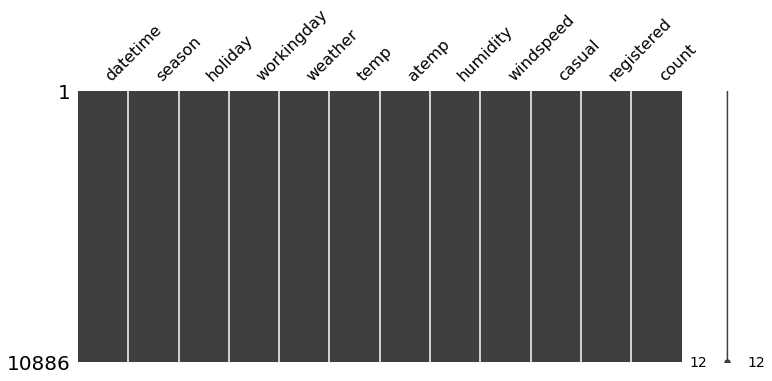

In [9]:
import missingno as msno

#missingno 라이브러리에 관한 내용
#https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=youji4ever&logNo=221623491491

msno.matrix(train, figsize=(12, 5))

#꽉 차있는걸 보니 결측치 걱정은 안해도 좋다

Q. 왜 타겟변수 count의 첨도와 왜도를 봤을까?
  
A.  


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Skewness: 1.242066
Kurtosis: 1.300093


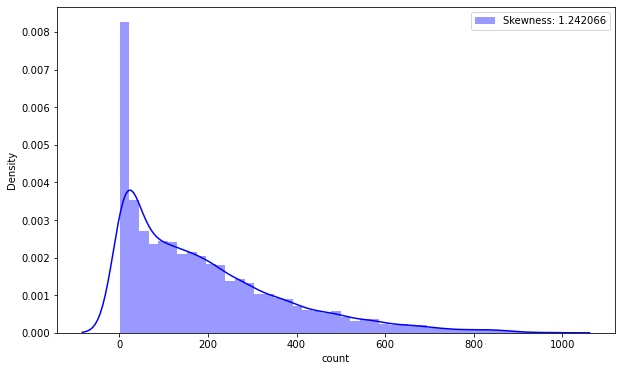

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt 

fig, ax = plt.subplots(1, 1, figsize = (10, 6))
g = sns.distplot(train['count'], color = "b", label = "Skewness: {:2f}".format(train['count'].skew()), ax=ax)
g = g.legend(loc = 'best')

print("Skewness: %f" % train['count'].skew())
print("Kurtosis: %f" % train['count'].kurt())

일단 count에 대부분의 데이터가 0에 몰려있음을 확인

Skewness: 1.242066
Kurtosis: 1.300093


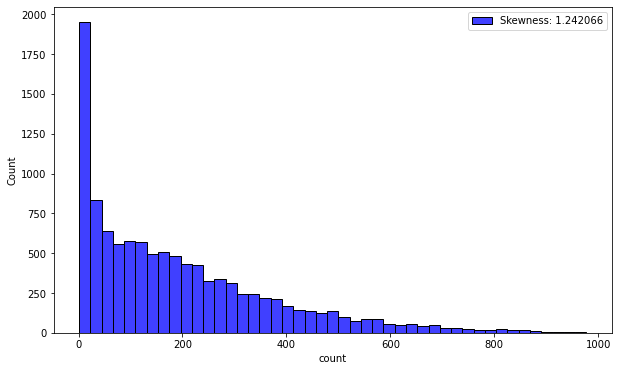

In [15]:
fig, ax = plt.subplots(1, 1, figsize = (10, 6))
a = sns.histplot(train['count'], color = "b", label = "Skewness: {:2f}".format(train['count'].skew()), ax=ax)
a = a.legend(loc = 'best')

print("Skewness: %f" % train['count'].skew())
print("Kurtosis: %f" % train['count'].kurt())